In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Gradient Descent

## Input: 
1. Objective function
2. Starting point
3. Number of iteration
4. Optimality gap

## Compute:

1. Gradient function
2. Compute the descent direction
3. Step size function
4. Stopping condition

## Visualisation:

Find the stationary point for the function $f(x) = x_1^2+x_2^2$

In [2]:
# Objective function: f(x)
def f(w):
    return np.sum(w*w)

# Function to compute the gradient: f'(x) = 2x
def grad(w):
    return 2*w

# Gradient descent: 
1. max_iterations: Maximum number of iterations to run
2. threshold: Stop if the difference in function values between two successive iterations falls below this threshold
3. w_init: Initial point from where to start gradient descent
4. obj_func: Reference to the function that computes the objective function
5. grad_func: Reference to the function that computes the gradient of the function
6. step_size: Step size for gradient descent. It should be in [0,1]


In [4]:
def descent_direction(grad_func,w_itr):
    #w is the current iteration
    #the descent direction is the opposite direction of the gradient
    
    return -grad_func(w_itr)

def step_size_basic(step_size,k):
    #k is the current iteration
    #step size = fixed step size /(k+1)
    step_update = step_size/(k+1)
    
    return step_update

#def step_size_Borwein(step_size,k,Type,w_history,f_history):


def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,
                     step_size=0.5):


    w = w_init
    # store the history of w and f
    w_history = w
    f_history = obj_func(w)
    
    #update direction
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10   #+infinity
    
    #stopping condition: (1) the number of iteration is larger than max_iterations, or
    #(2) the optimality gap is smaller than threshold
    
    while  i < max_iterations and diff>threshold:
        delta_w = step_size_basic(step_size,i)*descent_direction(grad_func,w)
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
        
    
    return w_history,f_history

# Visualisation

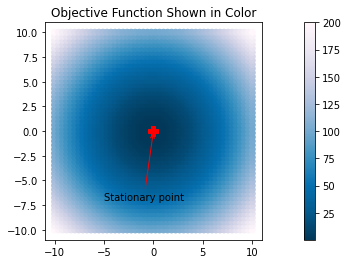

In [24]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.axis('scaled')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='PuBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('Stationary point',(0,0),(-5,-7),'red')    

pts,f_vals = visualize_fw()



In [76]:
# Objective function
#def f(w):
#    return np.sum(w*w)

# Function to compute the gradient
#def grad(w):
#    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):  
    
    # Make the function plot
    function_plot(pts,f_vals)
    
    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, figsize=(25, 5))
    learning_rates = [0.05,0.5,0.7,1.2]
    #momentum = [0,0.5,0.9]
    ind = 1
    
    # Iteration through all possible parameter combinations
    #for alpha in momentum:
    for eta,col in zip(learning_rates,[0,1,2,3]):
        plt.subplot(1,4,ind)        
        w_history,f_history = gradient_descent(5,0.05,w_init, f,grad,eta)
            
        visualize_learning(w_history)
        ind = ind+1
        plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
        #if col==1:
        #    plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

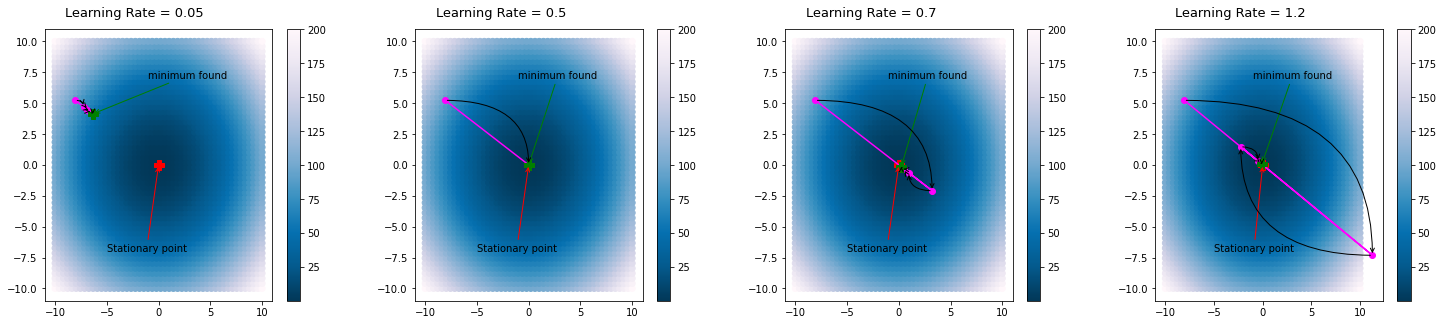

In [77]:
solve_fw()